# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


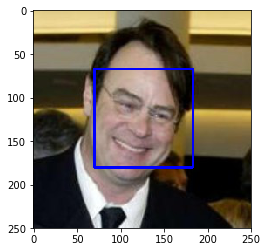

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x, y, w, h) in faces:
    # add bounding box to color image    
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0


### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

## TODO NO. 1 of 
# Step One - create a function
def face_detection_test(files):
    # create two count files
    detection_count = 0; # initial count of zero
    # create total count from the length of file
    total_count = len(files)
    
    ## Create a loop which adds for every face detected 
    ## through the function face_detector(img_path)
    for x in files:
        detection_count += face_detector(x)
        
    return detection_count, total_count

In [5]:
# Step Two - run the function on both parameters
print("Haar feature-based cascade classifiers  - Face Detection")
print("Detect face in human_files: {} / {}".format(face_detection_test(human_files_short)[0], face_detection_test(human_files_short)[1]))
print("Detect face in dog_files: {} / {}".format(face_detection_test(dog_files_short)[0], face_detection_test(dog_files_short)[1]))

Haar feature-based cascade classifiers  - Face Detection
Detect face in human_files: 98 / 100
Detect face in dog_files: 17 / 100


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
print(VGG16)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print("cuda available? {0}".format(use_cuda))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:10<00:00, 50856999.43it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path -- STEP ONE
    ## Return the *index* of the predicted class for that image -- STEP TWO
    
    # STEP ONE - Load and pre-process the image from given img_path
    # open the image
    image = Image.open(img_path)
    
    # transform the image
    # VGG16 takes 244,244 image size as input,
    size = 224
    
    # Create a data transform process - resize the input, normalize it and then convert to tensor
    data_transform = transforms.Compose([
                        transforms.RandomResizedCrop(size),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(45),
                        transforms.ToTensor(),  # transform it into a torch tensor
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225])])
    
    
    # Apply the above - transformation
    image_tensor = data_transform(image)
    
    # STEP TWO - return the *index*
    # Current image shape and size = (number of color channels, height and weight) (3 of them)
    # Pytorch required = (num input imgs, number of color channels, height and weight) (4 of them)
    # # fake batch dimension required to fit network's input dimensions
    image_tensor = image_tensor.unsqueeze_(0)
    
    # check for CUDA/GPU
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # run the tensor through VGG16    
    image_tensor = VGG16(image_tensor)
    
    # Returns a Tensor of shape (batch, num class labels)
    prediction_tensor = image_tensor.cpu().data.numpy().argmax()
    
    return  prediction_tensor # predicted class index


In [8]:
# Random Code Check - for personal inquiry
# This returns the index corresponding to the ImageNet class 
# .. that is predicted by the pre-trained VGG-16 model.
VGG16_predict(dog_files_short[57])

254

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    if class_index >= 151 and class_index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
The percentage of the detected dog - Humans: 1.0 %
The percentage of the detected dog - Dogs: 79.0 %

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detector_test(files):
    detection_count = 0;
    total_count = len(files)
    for x in files:
        detection_count += dog_detector(x)
    x = detection_count/total_count
    x = x * 100
    return x


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
print('VGG-16 Prediction')
print('The percentage of the detected dog - Humans: {} %'.format(dog_detector_test(human_files_short)))
print('The percentage of the detected dog - Dogs: {} %'.format(dog_detector_test(dog_files_short)))


VGG-16 Prediction
The percentage of the detected dog - Humans: 1.0 %
The percentage of the detected dog - Dogs: 79.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets, utils

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Step One - Define (pre-hyper)parameters
batch_size = 20 # Number of samples loaded for one batch
num_workers = 0 # Number of subprocesses, if it's 0, it uses the main process.
size = 224 # size required for the Image input for VGG16

# Step Two - Create path for data
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# Step Three - Create VGG16 standard normalization
# Normalize images because the values of images should be loaded between [0 - 1]
standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

# Step Four - built data_transform
# Transform for Training Set 
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Augment - Random Horizontal Flip
    transforms.RandomRotation(45),    # Augment -  Random Rotation
    transforms.RandomResizedCrop(size), # Augment - Random Resize Crop
    transforms.ToTensor(),
    standard_normalization
    ])

# Transform for Validation Set - MINIMUM Augment -  CenterCrop
# Validation data required for Validation Check - No Augmentation
transform_valid = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor(),
    standard_normalization
    ])

# Transform for Test Set - NO Augment - only resize image 
transform_test = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       standard_normalization
    ])


# Step Five - Data Batching for - test, train, and valid
# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=transform_valid)
test_data = datasets.ImageFolder(test_dir , transform=transform_test)


# Step Six - Data Loading
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,  
                                          batch_size=batch_size, 
                                          shuffle=False,
                                          num_workers=num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# Step Seven - Check the size of the dataset and Loaders
print("Size of Train Dataset = " + str(len(train_data)))
print("Size of Valid Dataset = " + str(len(valid_data)))
print("Size of Test Dataset = " + str(len(test_data)))
print("\n*********** \n")
print("Length of Train Loader - "  + str(len(train_loader)))
print("Length of Valid Loader - "  + str(len(valid_loader)))
print("Length of Test Loader - "  + str(len(test_loader)))


Size of Train Dataset = 6680
Size of Valid Dataset = 835
Size of Test Dataset = 836

*********** 

Length of Train Loader - 334
Length of Valid Loader - 42
Length of Test Loader - 42


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**
For train data : Random Horizontal Flip,Random Rotation and Random Resized Crop is used.
For validation data: Center Crop is used.
For test data: Image Augmentation is not done. Image Resizing is applied

Detail answers explained on cell itself.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = 133 # total classes of dog breeds
dropout = nn.Dropout(0.3) # dropout layer (p=0.3)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        ## ARCHITECTURE
        # convolutional layer 1 ==  (sees 224x224x3 image tensor, where 3 = input depth) to (222x222x16)
        # (input depth = 3, desired depth output = 16, kernel size = 3x3, default stride = 1, padding = 0)
        self.conv1 = nn.Conv2d( 3, 16, 3)
        # max pooling downsize (222x222x16) to (111x111x16)
        
        self.bn1 = nn.BatchNorm2d(16)
        
        # convolutional layer 2 ==  (sees 111x111x16 image tensor, 16 = input depth) to (109x109x32)
        # (input depth = 3, desired depth output = 32, kernel size = 3x3, default stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(16, 32, 3)
        # max pooling downsize (109x109x32) to (54x54x32)
        
        self.bn2 = nn.BatchNorm2d(32)
        
        # convolutional layer 3 ==  (sees 54x54x32 image tensor,  32 = input depth) to (52x52x64)
        # (input depth = 32, desired depth output = 64, kernel size = 3x3, default stride = 1, padding = 0)
        self.conv3 = nn.Conv2d(32, 64, 3)
        # max pooling downsize (52x52x64) to (26x26x64)
        self.bn3 = nn.BatchNorm2d(64)
        
        # convolutional layer 4 ==  (sees 26x26x64 image tensor,  64 = input depth) to (24x24x128)
        # (input depth = 64, desired depth output = 128, kernel size = 3x3, default stride = 1, padding = 0)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)
        # max pooling downsize (24x24x128) to (12x12x128)
        
        # convolutional layer 5 ==  (sees 12x12x128 image tensor,  128 = input depth) to (10x10x256)
        # (input depth = 128, desired depth output = 256, kernel size = 3x3, default stride = 1, padding = 0)
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.bn5 = nn.BatchNorm2d(256)
        # max pooling downsize (10x10x256) to (5x5x256)
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        # fully connected - - first linear layer (5x5x256) to (500)
        self.fc1 = nn.Linear( 5*5*256 , 500)
        
        # fully connected - - second linear layer (500 to num_classes)
        self.fc2 = nn.Linear(500, num_classes) # Last layer (output)
        
        # dropout layer (p=0.05)
        self.dropout = dropout
    
    def forward(self, x):
        ## Define forward behavior
        
        # # x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
                
        x = self.pool(F.relu(self.conv2(x)))
        #x = self.pool(F.BatchNorm1d(1536))
        x = self.pool(F.relu(self.conv3(x)))
        #x = self.pool(F.BatchNorm1d(6144))
        x = self.pool(F.relu(self.conv4(x)))
        #x = self.pool(F.BatchNorm1d(24576))
        x = self.pool(F.relu(self.conv5(x)))
        #x = self.pool(F.BatchNorm1d(98304))
        # flatten image input (transfer 2d image from CNN to linear layer)
        x = x.view(-1, 5 * 5 * 256)
        
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [14]:
## Check the model
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Input: 224x224x3, Kernel Size: 3x3, Padding: 1, dropout = 0.25, num_classes = 133, batch normalization = number according to features

Convolutional_layer_1: load in (224x224x3) tensors and convert to (222x222x16) tensors

Maxpooling: convert the output from Convolutional_layer_1 to (111x111x16)

Convolutional_layer_2: load in (111x111x16) tensors and convert to (109x109x32) tensors

Maxpooling: convert the output from Convolutional_layer_2 to (54x54x32)

Convolutional_layer_3: load in (54x54x32) tensors and convert to (52x52x64) tensors

Maxpooling: convert the output from Convolutional_layer_3 to (26x26x64)

Convolutional_layer_4: load in (26x26x64) tensors and convert to (24x24x128) tensors

Maxpooling: convert the output from Convolutional_layer_4 to (12x12x128)

Convolutional_layer_5: load in (12x12x128) tensors and convert to (10x10x256) tensors

Maxpooling: convert the output from Convolutional_layer_5 to (5x5x256)

Flatten: image input and feed it into 2 hidden layers, with ReLu activation.

Last layer (output) - 133 different labels, the output should include 133 classes (num_classes)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

# Create Parameter == Learning Rate
learning_rate = 0.05

### TODO: select optimizer
# Alternate 1
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learning_rate)

# ## ALTERNATE 2
# optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            ## Step One - clear the gradients 
            optimizer.zero_grad()
            
            # Step Two - forward pass through the model
            output = model(data)
            
            # Step Three - Calculate the batch loss
            loss = criterion(output, target)
            
            # Step Four - Calculate backward pass
            loss.backward()
            
            # Step Five - perform a single optimization
            optimizer.step()
            
            # Step Six - update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Batch %d, Loss: %.6f' %
                  (batch_idx + 1, train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # Step One - clear the gradient
            ## No NEED
            
            # Step Two - forward pass
            output = model(data)
            
            # Step Three - calculate the batch loss
            loss = criterion(output, target)
            
            # Step Four - backward pass
            ## NO NEED
        
            # Step Five - optimization
            ## NO NEED
            
            # Step Six - update validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        
        # Calculate average losses
        # train_loss = train_loss/len(train_loader.dataset)
        #valid_loss = valid_loss/len(valid_loader.dataset)
    
        # print training/validation statistics 
        print('\n Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ... \n'.format(
                    valid_loss_min,
                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

In [16]:
# Set Number of epochs
n_epochs = 50

# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Batch 1, Loss: 4.896860
Batch 101, Loss: 4.887929
Batch 201, Loss: 4.886650
Batch 301, Loss: 4.885718

 Epoch: 1 	Training Loss: 4.884458 	Validation Loss: 4.870793
Validation loss decreased (inf --> 4.870793).  Saving model ... 

Batch 1, Loss: 4.885763
Batch 101, Loss: 4.870797
Batch 201, Loss: 4.863326
Batch 301, Loss: 4.852962

 Epoch: 2 	Training Loss: 4.846397 	Validation Loss: 4.786507
Validation loss decreased (4.870793 --> 4.786507).  Saving model ... 

Batch 1, Loss: 4.753086
Batch 101, Loss: 4.786358
Batch 201, Loss: 4.775842
Batch 301, Loss: 4.767417

 Epoch: 3 	Training Loss: 4.764402 	Validation Loss: 4.673935
Validation loss decreased (4.786507 --> 4.673935).  Saving model ... 

Batch 1, Loss: 4.654085
Batch 101, Loss: 4.696647
Batch 201, Loss: 4.686586
Batch 301, Loss: 4.667090

 Epoch: 4 	Training Loss: 4.664882 	Validation Loss: 4.527152
Validation loss decreased (4.673935 --> 4.527152).  Saving model ... 

Batch 1, Loss: 4.801168
Batch 101, Loss: 4.616374
Batch 201, 

In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.916941


Test Accuracy: 30% (256/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# freeze all pretrained model parameters
for param in model_transfer.parameters():
    param.requires_grad = False

# get the last layer of the model    
n_inputs = model_transfer.fc.in_features

# Assigning last layer of the transferred model output with 133
last_layer = nn.Linear(n_inputs, 133, bias=True)

# Assign the output as last layer
model_transfer.fc = last_layer
    
for param in  model_transfer.fc.parameters():
    param.require_grad = True
    
# check to see that your last layer produces the expected number of outputs
print(model_transfer.fc.out_features)
print("***************")
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 52682143.78it/s]


133
***************
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), s

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I decide to keep most of the pre-trained parameters and just change the last layers to match the total out-feature as in this project.
Since transfer learning is done here by using bottleneck features from Resnet50 model as input, the architecture involves only a Average Pooling in last layer to get spatial average of the feature maps from Resnet50 model followed by a fully connected layer to reduce the tensor to a vector.

I was reading a paper on it, and felt it was gaining attention.
Residual networks also perform as good as any other highway network in practice. The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
Reference: Yet Another Accelerated SGD: ResNet-50 Training on ImageNet in 74.7 seconds. Masafumi Yamazaki, Akihiko Kasagi, et.al source - https://arxiv.org/abs/1903.12650

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

# Create Parameter == Learning Rate
learning_rate = 0.001

### TODO: select optimizer
optimizer_transfer = optim.SGD(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
n_epochs = 50

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Batch 1, Loss: 4.841884
Batch 101, Loss: 4.903346
Batch 201, Loss: 4.876167
Batch 301, Loss: 4.844004

 Epoch: 1 	Training Loss: 4.834670 	Validation Loss: 4.677491
Validation loss decreased (inf --> 4.677491).  Saving model ... 

Batch 1, Loss: 4.686268
Batch 101, Loss: 4.710580
Batch 201, Loss: 4.683651
Batch 301, Loss: 4.660715

 Epoch: 2 	Training Loss: 4.648677 	Validation Loss: 4.459632
Validation loss decreased (4.677491 --> 4.459632).  Saving model ... 

Batch 1, Loss: 4.485299
Batch 101, Loss: 4.529434
Batch 201, Loss: 4.510348
Batch 301, Loss: 4.492126

 Epoch: 3 	Training Loss: 4.482759 	Validation Loss: 4.269126
Validation loss decreased (4.459632 --> 4.269126).  Saving model ... 

Batch 1, Loss: 4.430983
Batch 101, Loss: 4.383295
Batch 201, Loss: 4.363075
Batch 301, Loss: 4.339761

 Epoch: 4 	Training Loss: 4.332453 	Validation Loss: 4.066495
Validation loss decreased (4.269126 --> 4.066495).  Saving model ... 

Batch 1, Loss: 4.274384
Batch 101, Loss: 4.235884
Batch 201, 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.045076


Test Accuracy: 80% (675/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]


In [25]:
loaders_transfer['train'].dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [26]:
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [27]:
from PIL import Image
import torchvision.transforms as transforms

def predict_breed_transfer(img_path):
    
    # load the image and return the predicted breed
    img=Image.open(img_path)
    
    # Pre-process the image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

    # Apply transform
    transform = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       normalize
    ])

    # Get the image tensor
    img_tensor = transform(img)
    
    # Unsqeeze the image
    # Why? refer above - to add one more column, make compatible
    img_tensor.unsqueeze_(0)

    # Send the image to GPU, if available
    if use_cuda: 
        img_tensor = img_tensor.cuda()
       
    # Send the image through the pre-trained model
    output = model_transfer(img_tensor)
    
    _, prediction = torch.max(output.data,1)
    
    # Get the predicted breed name for the image
    breed_name = class_names[prediction-1]
    
    # Return the breed_name for the given image
    return breed_name


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [28]:
### Feel free to use as many code cells as needed.
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path) == True: 
        prediction = predict_breed_transfer(img_path)
        print("Dogs Detected!\nIt looks like a: {0}".format(prediction))
    elif face_detector(img_path) == True:
        prediction = predict_breed_transfer(img_path)
        print("Human Detected!\nYou look like a: {0}".format(prediction))
    else:
        print("No Dogs or Humans Detected")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ __Answer:__ (Three possible points for improvement)
Output is not as I expected. I could do better. I can improve on my results via

    More Training Datasets (more images)
    Hyper-parameters tweaking (Dropout, Learning Rate, Optimizers, Batch Size)
    More tweaking to pre-processed data - (Rotation, Center Crop, Shuffle, etc)


In [29]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
def testpath(path):
    test_figure = np.array(glob(path))
    test_figure_path = [i for i in test_figure]
    #print(len(test_figure_path))

    # suggested code, below
    fig = plt.figure()
    fig_index = 0
    print(len(test_figure_path))
    for i in range(len(test_figure_path)):

        file = test_figure_path[i]
        pred = run_app(file)

        fig_index += 1

        img=np.asarray(Image.open(file))

1


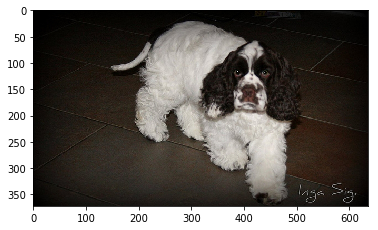

Dogs Detected!
It looks like a: Clumber spaniel


In [32]:
testpath('/data/dog_images/test/053.Cocker_spaniel/Cocker_spaniel_03759.jpg')

1


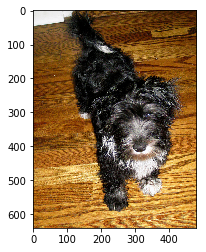

Dogs Detected!
It looks like a: Mastiff


In [33]:
testpath('/data/dog_images/test/100.Lowchen/Lowchen_06685.jpg')